# Importações

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
from sqlalchemy import create_engine

# Conexão ao PostgreSQl

### Dados de meterology

In [2]:
user = "avnadmin"
password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
host = "postgresql-iscac.f.aivencloud.com"
port = "25674"
bucket = "Seasonality"

# URL de conexão com PostgreSQL
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

#Nome da tabela 
meteorology ='meteorology'

### Dados de bicycle

In [3]:
# user = "avnadmin"
# password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
# host = "postgresql-iscac.f.aivencloud.com"
# port = "25674"
# bucket = "Seasonality"

# # URL de conexão com PostgreSQL
# engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

# #Nome da tabela 
# meteorology ='bicycle_counter'

# Importar dados do PostgreSQl

### Dados de meterology

In [4]:
try:
    # Ler os dados da tabela no DataFrame
    df_meterology = pd.read_sql(f"SELECT * FROM {meteorology}", con=engine)
    
    # Exibir as duas primeiras colunas
    print(df_meterology.head())  # Seleciona apenas as duas primeiras colunas e mostra as 5 primeiras linhas
except Exception as e:
    print(f"Erro ao importar os dados: {e}")

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2021-08-01 00:00:00  17.6       17.6  11.7     68.66     0.0         0.0   
1 2021-08-01 01:00:00  17.4       17.4  12.6     73.22     0.0         0.0   
2 2021-08-01 02:00:00  17.1       17.1  12.7     75.40     0.0         0.0   
3 2021-08-01 03:00:00  17.1       17.1  12.7     75.35     0.0         0.0   
4 2021-08-01 04:00:00  17.0       17.0  12.4     74.52     0.0         0.0   

  preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0       None       NaN       25.0    337.0            1020.7         NaN   
1       None       NaN       18.2    338.0            1020.7         NaN   
2       None       NaN       17.9    329.0            1020.0         NaN   
3       None       NaN       11.2    329.0            1019.9         NaN   
4       None       NaN        8.4    349.0            1019.5         NaN   

   visibility conditions                                  stations  
0    

### Dados de bicycle

In [5]:
# Como a Api ainda não esta a funcionar, vou importar os dados de um csv
df_bicycle = pd.read_csv('../all_bike_counts.csv', parse_dates=['detected'], dtype='int32')
df_bicycle = df_bicycle.set_index('detected')
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22632 entries, 2021-08-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   direction_2   22632 non-null  int32
 1   count_2       22632 non-null  int32
 2   direction_3   22632 non-null  int32
 3   count_3       22632 non-null  int32
 4   direction_4   22632 non-null  int32
 5   count_4       22632 non-null  int32
 6   direction_5   22632 non-null  int32
 7   count_5       22632 non-null  int32
 8   direction_6   22632 non-null  int32
 9   count_6       22632 non-null  int32
 10  direction_7   22632 non-null  int32
 11  count_7       22632 non-null  int32
 12  direction_8   22632 non-null  int32
 13  count_8       22632 non-null  int32
 14  direction_9   22632 non-null  int32
 15  count_9       22632 non-null  int32
 16  direction_10  22632 non-null  int32
 17  count_10      22632 non-null  int32
 18  direction_11  22632 non-null  i

In [6]:
df_loc = pd.read_csv('../all_counter_locations.csv')
df_loc.info()
print()
print(df_bicycle.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locationId         31 non-null     int64  
 1   tenantIdentifier   31 non-null     object 
 2   name               31 non-null     object 
 3   cp7                31 non-null     object 
 4   freguesia          31 non-null     object 
 5   directionPositive  0 non-null      float64
 6   directionNegative  0 non-null      float64
 7   latitude           31 non-null     float64
 8   longitude          31 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.3+ KB

                     direction_2  count_2  direction_3  count_3  direction_4  \
detected                                                                       
2021-08-01 00:00:00            0        0            1        1            0   
2021-08-01 01:00:00            3        3            0        2    

# Analises

C:\Users\joana\AppData\Local\Temp\ipykernel_21008\1198515995.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\1198515995.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\1198515995.py:20: Se

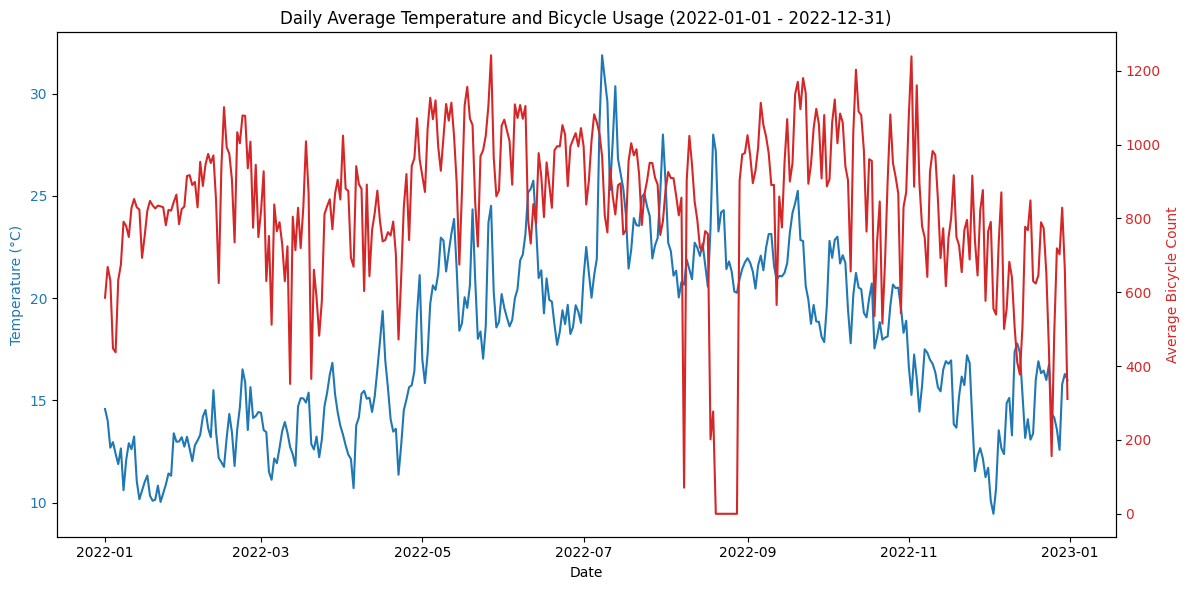

In [7]:

import matplotlib.pyplot as plt

# Definir o intervalo de datas para análise
start_date = '2022-01-01'
end_date = '2022-12-31'

# Filtrar os dados de meteorologia para o intervalo de datas
df_meterology_filtered = df_meterology[(df_meterology['datetime'] >= start_date) & (df_meterology['datetime'] <= end_date)]
df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data

# Filtrar os dados de contagem de bicicletas para o intervalo de datas
df_bicycle_filtered = df_bicycle[(df_bicycle.index >= start_date) & (df_bicycle.index <= end_date)]
df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data

# Calcular a média diária da temperatura
df_temp_daily = df_meterology_filtered.groupby('date')['temp'].mean()

# Calcular a média diária da contagem de bicicletas (soma de todas as colunas count_)
count_columns = [col for col in df_bicycle_filtered.columns if 'count_' in col]
df_bicycle_filtered['total_count'] = df_bicycle_filtered[count_columns].sum(axis=1)  # Soma de todos os contadores
df_bike_daily = df_bicycle_filtered.groupby('date')['total_count'].mean()  # Média diária das contagens

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar a temperatura (linha azul)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.plot(df_temp_daily.index, df_temp_daily, color='tab:blue', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Average Bicycle Count', color='tab:red')
ax2.plot(df_bike_daily.index, df_bike_daily, color='tab:red', label='Bicycle Count')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adicionar título e legenda
plt.title(f'Daily Average Temperature and Bicycle Usage ({start_date} - {end_date})')
fig.tight_layout()
plt.show()





In [25]:
# Definir o intervalo de datas para análise
start_date = '2022-01-01'
end_date = '2022-12-31'

C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2634895792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2634895792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2634895792.py:14: Set

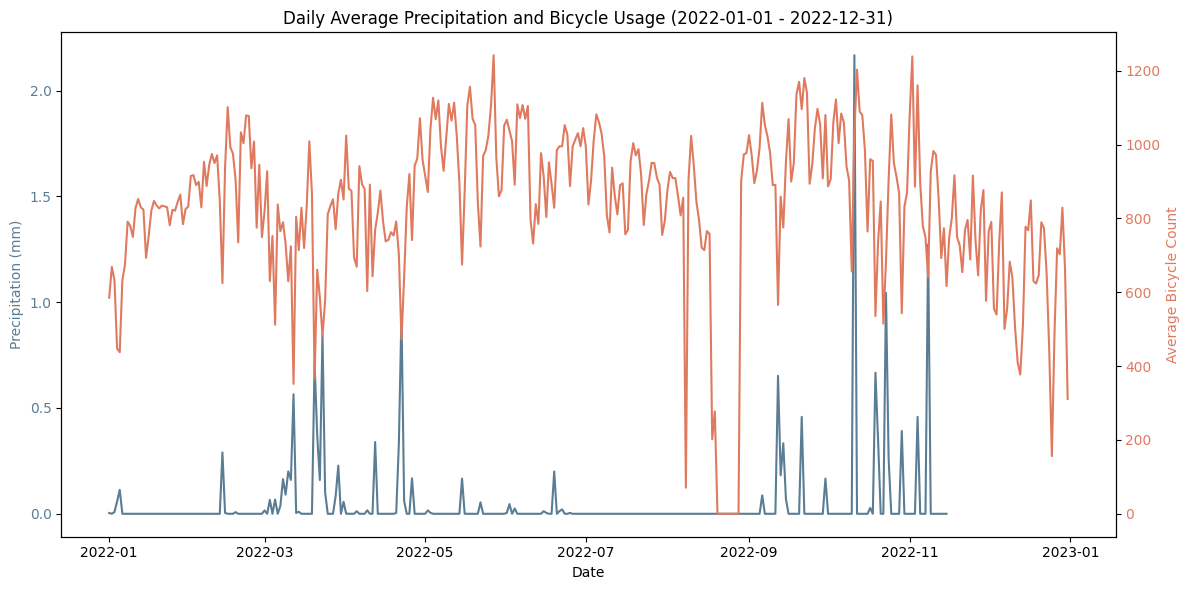

In [27]:



# Filtrar os dados de meteorologia para o intervalo de datas
df_meterology_filtered = df_meterology[(df_meterology['datetime'] >= start_date) & (df_meterology['datetime'] <= end_date)]
df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data

# Filtrar os dados de contagem de bicicletas para o intervalo de datas
df_bicycle_filtered = df_bicycle[(df_bicycle.index >= start_date) & (df_bicycle.index <= end_date)]
df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data

# Calcular a média diária da precipitação
df_precip_daily = df_meterology_filtered.groupby('date')['precip'].mean()

# Calcular a média diária da contagem de bicicletas (soma de todas as colunas count_)
count_columns = [col for col in df_bicycle_filtered.columns if 'count_' in col]
df_bicycle_filtered['total_count'] = df_bicycle_filtered[count_columns].sum(axis=1)  # Soma de todos os contadores
df_bike_daily = df_bicycle_filtered.groupby('date')['total_count'].mean()  # Média diária das contagens

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar a precipitação (linha azul)
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation (mm)', color='#5A7D94')
ax1.plot(df_precip_daily.index, df_precip_daily, color='#5A7D94', label='Precipitation')
ax1.tick_params(axis='y', labelcolor='#5A7D94')

# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Average Bicycle Count', color='#E07A5F')
ax2.plot(df_bike_daily.index, df_bike_daily, color='#E07A5F', label='Bicycle Count')
ax2.tick_params(axis='y', labelcolor='#E07A5F')

# Adicionar título e legenda
plt.title(f'Daily Average Precipitation and Bicycle Usage ({start_date} - {end_date})')
fig.tight_layout()
plt.show()


C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2562278898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2562278898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicycle_filtered['date'] = df_bicycle_filtered.index.date
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\2562278898.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

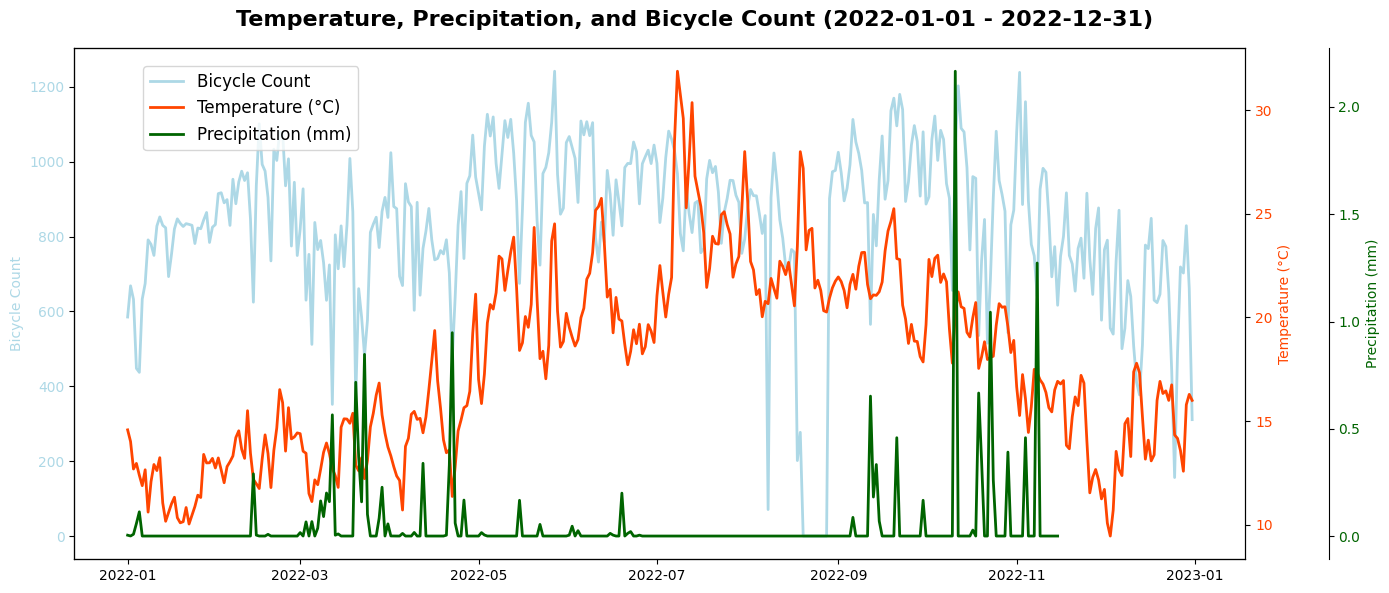

In [28]:

# Filtrando os dados para o intervalo de datas
df_meterology_filtered = df_meterology[(df_meterology['datetime'] >= start_date) & (df_meterology['datetime'] <= end_date)]
df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date

df_bicycle_filtered = df_bicycle[(df_bicycle.index >= start_date) & (df_bicycle.index <= end_date)]
df_bicycle_filtered['date'] = df_bicycle_filtered.index.date

# Calculando as médias diárias
df_temp_daily = df_meterology_filtered.groupby('date')['temp'].mean()
df_precip_daily = df_meterology_filtered.groupby('date')['precip'].mean()
df_bicycle_filtered['total_count'] = df_bicycle_filtered.filter(like='count_').sum(axis=1)
df_bike_daily = df_bicycle_filtered.groupby('date')['total_count'].mean()

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotando a contagem de bicicletas como linha
ax1.plot(df_bike_daily.index, df_bike_daily, color='lightblue', linewidth=2, label='Bicycle Count')
ax1.set_ylabel('Bicycle Count', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Criando o segundo eixo Y para a temperatura e precipitação
ax2 = ax1.twinx()

# Plotando a temperatura com linha
ax2.plot(df_temp_daily.index, df_temp_daily, color='orangered', linewidth=2, label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')

# Criando o terceiro eixo Y para a precipitação
ax3 = ax1.twinx()

# Ajustando o eixo Y para que ele não se sobreponha aos outros
ax3.spines['right'].set_position(('outward', 60))

# Plotando a precipitação com linha
ax3.plot(df_precip_daily.index, df_precip_daily, color='darkgreen', linewidth=2, label='Precipitation (mm)')
ax3.set_ylabel('Precipitation (mm)', color='darkgreen')
ax3.tick_params(axis='y', labelcolor='darkgreen')

# Ajustando o título geral
fig.suptitle(f'Temperature, Precipitation, and Bicycle Count ({start_date} - {end_date})', fontsize=16, fontweight='bold')

# Adicionando a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()



In [29]:
# Converter a coluna 'datetime' para o tipo correto
df_meterology_filtered['date'] = pd.to_datetime(df_meterology_filtered['datetime']).dt.date
df_bicycle_filtered['date'] = pd.to_datetime(df_bicycle_filtered.index).date


C:\Users\joana\AppData\Local\Temp\ipykernel_21008\1420471891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meterology_filtered['date'] = pd.to_datetime(df_meterology_filtered['datetime']).dt.date
C:\Users\joana\AppData\Local\Temp\ipykernel_21008\1420471891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicycle_filtered['date'] = pd.to_datetime(df_bicycle_filtered.index).date


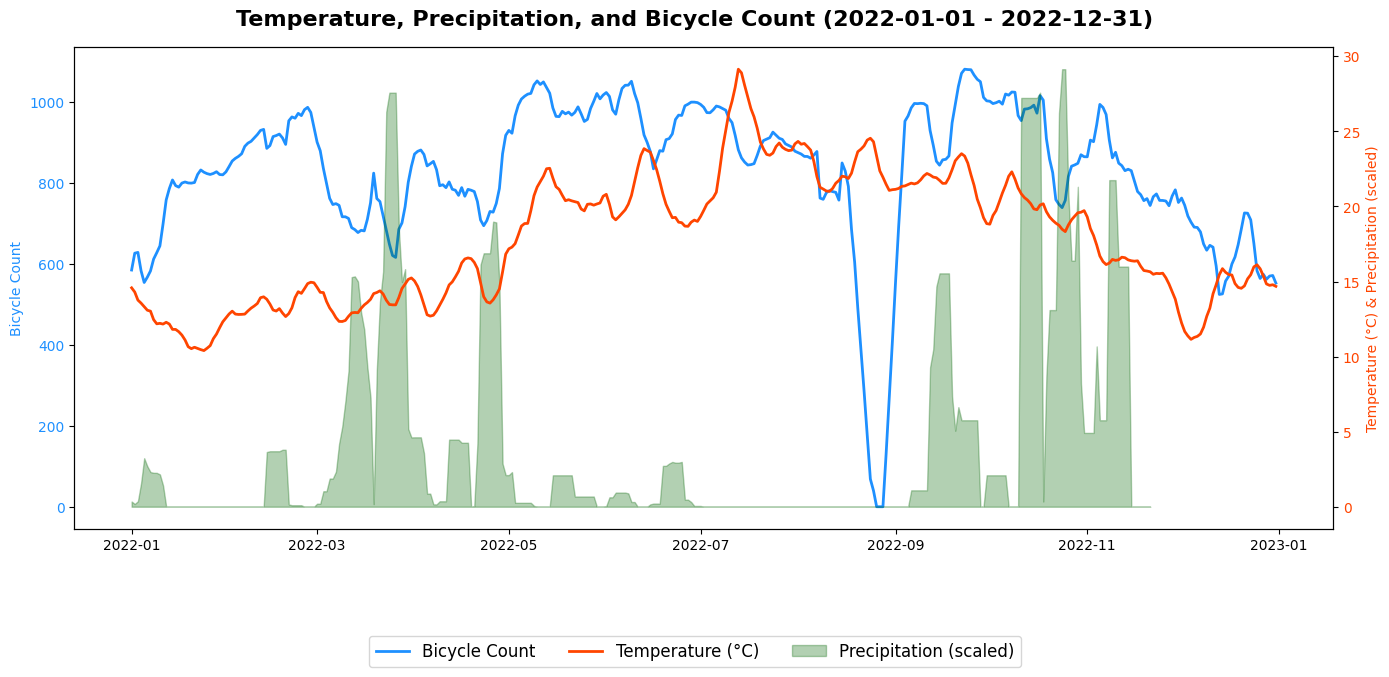

In [30]:


df_temp_daily = df_meterology_filtered.groupby(pd.to_datetime(df_meterology_filtered['date']))['temp'].mean()
df_precip_daily = df_meterology_filtered.groupby(pd.to_datetime(df_meterology_filtered['date']))['precip'].mean()
df_bike_daily = df_bicycle_filtered.groupby(pd.to_datetime(df_bicycle_filtered['date']))['total_count'].mean()

# Aplicando uma média móvel de 7 dias para suavizar os dados
df_bike_daily_smooth = df_bike_daily.rolling(window=7, min_periods=1).mean()
df_temp_daily_smooth = df_temp_daily.rolling(window=7, min_periods=1).mean()
df_precip_daily_smooth = df_precip_daily.rolling(window=7, min_periods=1).mean()

# Criando a figura
fig, ax1 = plt.subplots(figsize=(14, 6))

# Gráfico da contagem de bicicletas
ax1.plot(df_bike_daily_smooth.index, df_bike_daily_smooth, color='dodgerblue', linewidth=2, label='Bicycle Count')
ax1.set_ylabel('Bicycle Count', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')

# Criando o segundo eixo Y para temperatura e precipitação
ax2 = ax1.twinx()

# Gráfico da temperatura
ax2.plot(df_temp_daily_smooth.index, df_temp_daily_smooth, color='orangered', linewidth=2, label='Temperature (°C)')

# Normalizando a precipitação para que fique em uma escala semelhante à temperatura
max_precip = df_precip_daily_smooth.max()
df_precip_normalized = df_precip_daily_smooth * (df_temp_daily_smooth.max() / max_precip)  # Ajusta escala

# Gráfico da precipitação
ax2.fill_between(df_precip_normalized.index, df_precip_normalized, color='darkgreen', alpha=0.3, label='Precipitation (scaled)')

ax2.set_ylabel('Temperature (°C) & Precipitation (scaled)', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')

# Título mais destacado
fig.suptitle(f'Temperature, Precipitation, and Bicycle Count ({start_date} - {end_date})', 
             fontsize=16, fontweight='bold')

# Ajuste da legenda

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

# Melhorando o layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Dá espaço para a legenda

# Exibindo o gráfico
plt.show()
